### Supervised Learning: Linear Regression
In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.  
If you're interested in the deeper mathematics of linear regession methods, check out the wikipedia page and also check out Andrew Ng's wonderful lectures for free on youtube.  
In this section we will be working through linear regression with the following steps:  

Step 1: Getting and setting up the data.  
Step 2: Visualizing current data.  
Step 3: The mathematics behind the Least Squares Method.  
Step 4: Using Numpy for a Univariate Linear Regression.  
Step 5: Getting the error.  
Step 6: Using scikit learn to implement a multivariate regression.  
Step 7: Using Training and Validation.    
Step 8: Predicting Prices  
Step 9 : Residual Plots  
Step 1: Getting and setting up the data.  

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.


In [37]:
#  jt -t grade3 -T -N -f roboto -fs 11 -tf amikosans -tfs 12
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [8]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

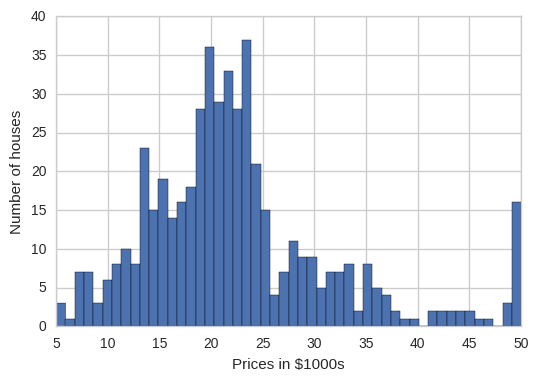

In [9]:
plt.hist(boston.target, bins=50) # bins 1/10 instanced
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

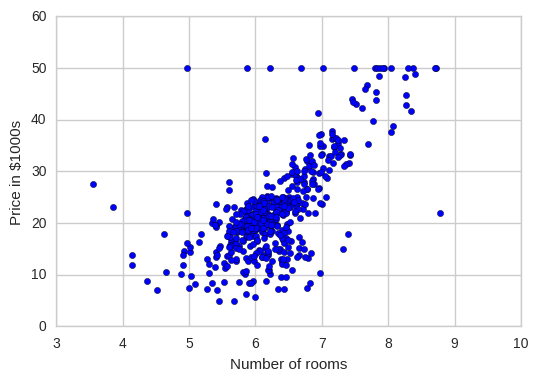

In [10]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [11]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['Price'] = boston.target

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


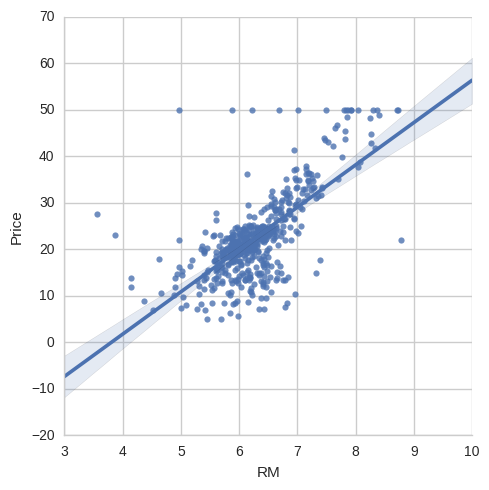

In [14]:
sns.lmplot('RM','Price', data=boston_df)

### Step3: Mathematics behind the Least Squares Method

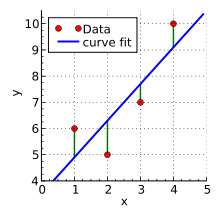

In [15]:
# Quick display of image from 
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were: $$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$
So how do we find this line? The least-square line approximating the set of points:
$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$
has the equation: $$ Y = a_{0} +a_{1}X $$ this is basically just a rewritten form of the standard equation for a line: $$Y=mx+b$$
We can solve for these constants a0 and a1 by simultaneously solving these equations: $$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$
These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great video.  
For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.  

### Step 4: Using Numpy for a Univariate Linear Regression
Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.  
We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [19]:
# Set up X as median room values
X = boston_df.RM

In [23]:
X = np.vstack(boston_df.RM) #making two dimensional


(506, 1)

In [24]:
X.shape

(506, 1)

In [25]:
Y = boston_df.Price

In [26]:
Y.shape

(506,)

In [27]:
type(Y)

pandas.core.series.Series

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.
We know that a line has the equation: $$y=mx+b$$ which we can rewrite using matrices: $$y=Ap$$ where: $$A = \begin{bmatrix}x   1\end{bmatrix}$$ and $$p= \begin{bmatrix}m \\b\end{bmatrix}$$
This is the same as the first equation if you carry out the linear algebra. So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]


In [29]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [30]:
# [X 1] create form : A matrix form
X = np.array([ [value,1] for value in X] )

In [31]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [32]:
m , b = np.linalg.lstsq(X, Y)[0] # liear fit - 1st index value of least square linear algebra

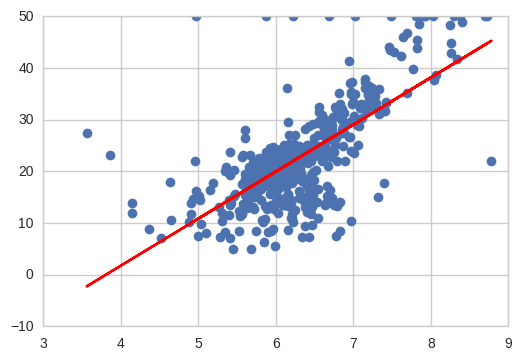

In [34]:
plt.plot(boston_df.RM, boston_df.Price,'o') #original 

x = boston_df.RM

plt.plot(x, m*x + b,'r', label='Best Fit Line')

### Step 5: Getting the error
Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation here, we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier.  

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.  

For now let's see how we can get the root mean squared error of the line we just fitted.

In [36]:
result = np.linalg.lstsq(X,Y)
#read all documentation
error_total = result[1] #error index[1]

rmse = np.sqrt(error_total/len(x))

print 'The root mean sequare error was %.2f' % rmse

The root mean sequare error was 6.60


The root mean squared error was 6.60   
Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).  
Thus we can reasonably expect a house price to be within $13,200 of our line fit. 

### Step 6: Using scikit learn to implement a multivariate regression
Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!  

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.


The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods.  
The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [38]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [40]:
lreg = LinearRegression()

In [41]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [42]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print 'The estimated intercept coefficient is %.2f' % lreg.intercept_

print 'The number of coefficients used was %d ' % len(lreg.coef_)

The estimated intercept coefficient is 36.49
The number of coefficients used was 13 


 The number of coefficients used was 13   
 
Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out [the documentation](https://en.wikipedia.org/wiki/Coefficient_of_determination) for this equation: $$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$
Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept  

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [48]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

In [49]:
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Step 7: Using Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.  

Fortunately, scikit learn has a built in function specifically for this called train_test_split.
The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [51]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price) # X training, X testing, Y training, Y test

In [52]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [55]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [58]:
print " Fit a model X_train, and calculate the MSE with Y_train %.2f " % np.mean((Y_train-pred_train)**2)
print " Fit a model X_train, and calculate the MSE with X_test and Y test: %.2f " % np.mean((Y_test-pred_test)**2)

 Fit a model X_train, and calculate the MSE with Y_train 45.37 
 Fit a model X_train, and calculate the MSE with X_test and Y test: 38.46 


### Step 9 : Residual Plots
In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:
$$Residual = Observed\:value - Predicted\:value $$  
You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.  


A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.  


Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.  


So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis).


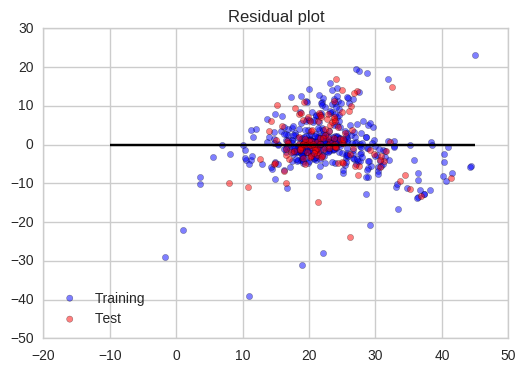

In [67]:
train = plt.scatter(pred_train,(pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=45) # mess around

plt.legend((train, test), ('Training','Test'),loc='lower left')

plt.title('Residual plot')

more linear regression model
[link](http://scikit-learn.org/stable/modules/linear_model.html#linear-model)